In [1]:
from __future__ import division, print_function

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from scipy import interpolate

In [5]:
from mpldatacursor import datacursor

In [83]:
dmsi_coords = [10, 10, 7.7, 6.4, 5, 5, 5, 5, 5, 5]

In [84]:
rj_coords = [0.5, 2.5, 1.59, 1.68, 1.83, 1.97, 2.06, 2.24, 1.59, 2.13]

In [85]:
# 8G CEM AIC Cal Data from John Dorighi
eh_irreg = [42.96, 38.31, 42.4, 42.4, 42.1, 41.4, 40.2, 40.7, 42, 40.4]
ew_irreg = [42.81, 31.49, 38.4, 38.7, 38.3, 37.5, 36.5, 34.3, 39.6, 35.8]

In [86]:
xmin = min(dmsi_coords)
xmax = max(dmsi_coords)
ymin = min(rj_coords)
ymax = max(rj_coords)
N_dmsi = 100
N_rj = 100
dmsi_interp = np.linspace(xmin, xmax, N_dmsi)
rj_interp = np.linspace(ymin, ymax, N_rj)
xx, yy = np.meshgrid(dmsi_interp, rj_interp)

First plot the raw Eye Height & Eye Width data

In [87]:
eh_interp = interpolate.griddata((dmsi_coords, rj_coords), eh_irreg, (xx, yy))
ew_interp = interpolate.griddata((dmsi_coords, rj_coords), ew_irreg, (xx, yy))

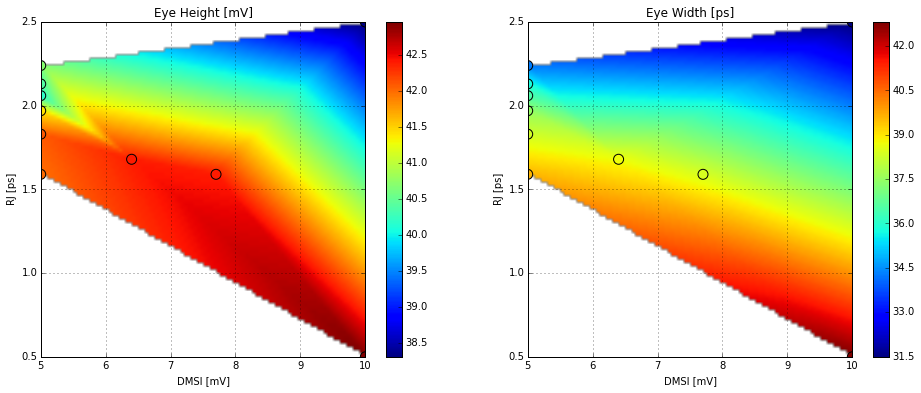

In [114]:
fig = plt.figure(figsize=(16, 6))
eh_ax = plt.subplot(121)
plt.imshow(np.flipud(eh_interp), extent=[xx.min(), xx.max(), yy.min(), yy.max()], aspect = "auto")
plt.scatter(dmsi_coords, rj_coords, c=eh_irreg, s=100)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Eye Height [mV]")
plt.ylabel("RJ [ps]")
plt.xlabel("DMSI [mV]")
plt.grid()
plt.colorbar()
eh_ax = plt.subplot(122)
plt.imshow(np.flipud(ew_interp), extent=[xx.min(), xx.max(), yy.min(), yy.max()], aspect = "auto")
plt.scatter(dmsi_coords, rj_coords, c=ew_irreg, s=100)
plt.axis([xmin, xmax, ymin, ymax])
plt.title("Eye Width [ps]")
plt.ylabel("RJ [ps]")
plt.xlabel("DMSI [mV]")
plt.grid()
plt.colorbar()
plt.show()

Now create a new combined Eye Height/Width RSS goal

In [89]:
ideal_eh = 40
eh_variation = 1
ideal_ew = 35
ew_variation = 1
ehew_dev = np.sqrt(((eh_interp-ideal_eh)/eh_variation)**2 + ((ew_interp-ideal_ew)/ew_variation)**2)

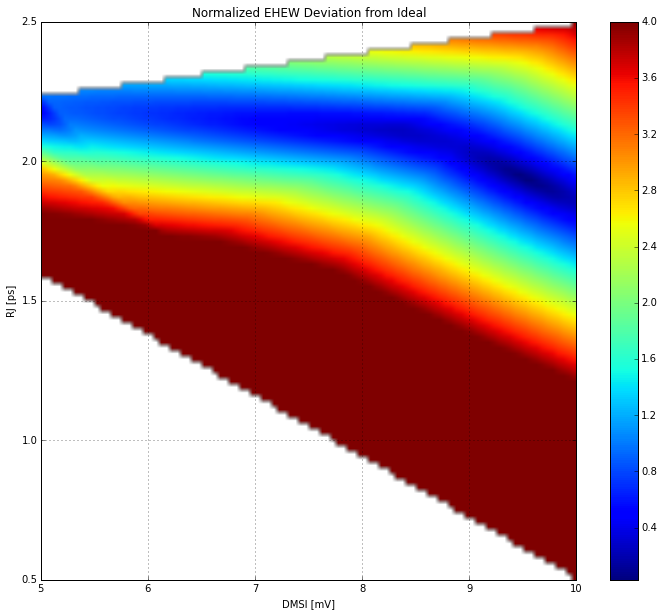

In [120]:
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(111)
cax = ax.imshow(np.flipud(ehew_dev), extent=[xx.min(), xx.max(), yy.min(), yy.max()], vmax = 4, aspect = "auto")
numrows, numcols = ehew_dev.shape
def format_coord(x, y):
    col = np.searchsorted(dmsi_new,x)
    row = np.searchsorted(lv_new,y)
    if col>=0 and col<numcols and row>=0 and row<numrows:
        eh_val = eh_new[row,col]
        ew_val = ew_new[row,col]
        return 'x=%1.4f, y=%1.4f, eh=%1.4f, ew=%1.4f'%(x, y, eh_val, ew_val)
    else:
        return 'x=%1.4f, y=%1.4f'%(x, y)
ax.format_coord = format_coord
ax.grid()
ax.set_title("Normalized EHEW Deviation from Ideal")
ax.set_ylabel("RJ [ps]")
ax.set_xlabel("DMSI [mV]")
cbar = fig.colorbar(cax)
plt.show()

Find minimum of ehew_dev (closest to ideal value)

In [91]:
np.nanmin(ehew_dev)

0.028040977338388715

Find coordinates of the ideal location

In [110]:
idx_min_ehew = np.nanargmin(ehew_dev) # Index of minima
#idx_min_ehew
dmsi_idx = idx_min_ehew%N_dmsi
rj_idx = idx_min_ehew//N_dmsi
rj_idx, dmsi_idx
dmsi_interp[dmsi_idx], rj_interp[rj_idx]

(9.5959595959595951, 1.9343434343434345)